### Task 4: Email Spam Detection with Machine Learning:

In this project, we are using Python to build an Email spam detector and using Machine Learning to train the spam detector to recognise and classify Emails into spam and non-spams. Let's look into it.

In [1]:
#Imprting all the necessary libararaies:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [2]:
df= pd.read_csv('spamemails.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [7]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [8]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df.shape

(5572, 3)

In [10]:
 X = df['Category']  
Y = df['Message'] 

In [11]:
 #Splitting the data into training and test data:

X_train, X_test, Y_train, Y_test = train_test_split(df.Message,df.spam,test_size=0.25)

In [12]:
 print(X.shape)
print(X_train.shape)
print(X_test.shape) 

(5572,)
(4179,)
(1393,)


In [13]:
cv = CountVectorizer()   ## Bernuallis classification has 1 and 0 i.e. occurences of word 
X_train_ft = cv.fit_transform(X_train.values)
X_train_ft.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Naive Bayes - MultinomialNB: 

In [14]:
model = MultinomialNB() 
model.fit(X_train_ft,Y_train)


MultinomialNB()

In [15]:
#building a predictive system
emails = ['Ahhh. Work. I vaguely remember that! What does it feel like? Lol','PRIVATE! Your 2003 Account Statement for 07815296484 shows 800 un-redeemed S.I.M. points. Call 08718738001 Identifier Code 41782 Expires 18/11/04']
emails_countno = cv.transform(emails)
model.predict(emails_countno) 
#Here 0 indicates non-spam and 1 indicates spam

array([0, 1], dtype=int64)

In [16]:
X_test_countno= cv.transform(X_test) 


In [17]:
model.score(X_test_countno,Y_test) #accuracy 

0.9755922469490309

### Pipeline:

In [18]:
#Automate ml
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('mnb',MultinomialNB())
])   

In [19]:
clf.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [20]:
clf.score(X_test,Y_test)

0.9755922469490309

In [21]:
clf.predict(emails)

array([0, 1], dtype=int64)

In [22]:
predt = clf.predict(X_train)


In [23]:
print(classification_report(Y_train, predt)) #model accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       0.98      0.98      0.98       545

    accuracy                           1.00      4179
   macro avg       0.99      0.99      0.99      4179
weighted avg       1.00      1.00      1.00      4179



In [24]:
co_matrix = confusion_matrix(Y_train, predt)

<Axes: >

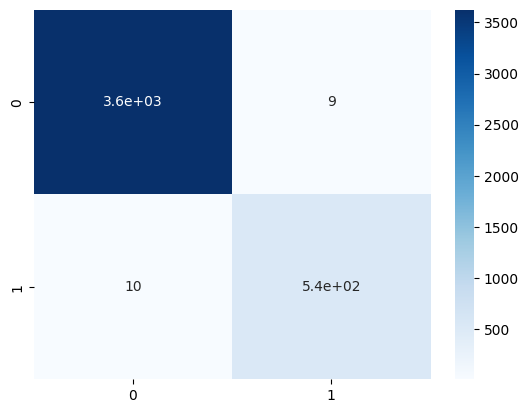

In [25]:
sns.heatmap(co_matrix, annot=True, cmap='Blues')

<Axes: >

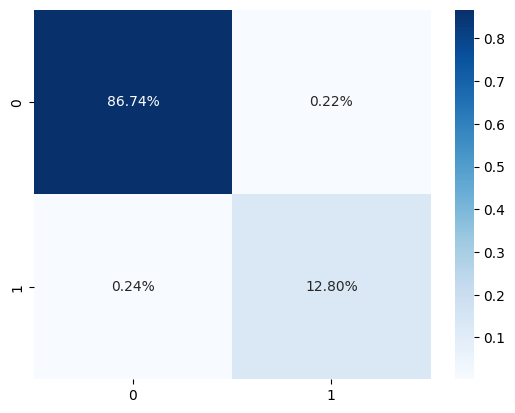

In [26]:
sns.heatmap(co_matrix/np.sum(co_matrix), annot=True, fmt='.2%', cmap='Blues')

In [27]:
print("Accuracy is:", accuracy_score(Y_train, predt))

Accuracy is: 0.9954534577650156


### Support Vector Machine (SVM):

In [28]:
clf = svm.SVC() 
clf.fit(X_train_ft, Y_train)

SVC()

In [29]:
training_data_predt = model.predict(X_train_ft)


In [30]:
training_data_accuracy = accuracy_score(Y_train, training_data_predt)

In [31]:
print('Accuracy is: ', training_data_accuracy)

Accuracy is:  0.9954534577650156


### Logistic Regression:

In [32]:
model = LogisticRegression()
model.fit(X_train_ft,Y_train)

LogisticRegression()

In [33]:
training_data_predt1 = model.predict(X_train_ft)


In [34]:
training_data_accuracy1 = accuracy_score(Y_train, training_data_predt1)

In [35]:
print('Accuracy is: ', training_data_accuracy1)

Accuracy is:  0.998324958123953
